In [63]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import yfinance as yf

In [64]:
style.use('ggplot')

In [65]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2022,12,31)

In [66]:
stocks = ["AAPL", "TSLA", 'AMZN', "KRE"]
price = yf.download(stocks, start = start, end = end )
print(price.head(5))

[*********************100%***********************]  4 of 4 completed
            Adj Close                                       Close             \
                 AAPL       AMZN        KRE       TSLA       AAPL       AMZN   
Date                                                                           
2018-01-02  40.888065  59.450500  51.666573  21.368668  43.064999  59.450500   
2018-01-03  40.880939  60.209999  51.762905  21.150000  43.057499  60.209999   
2018-01-04  41.070835  60.479500  52.043137  20.974667  43.257500  60.479500   
2018-01-05  41.538433  61.457001  52.384651  21.105333  43.750000  61.457001   
2018-01-08  41.384159  62.343498  52.288330  22.427334  43.587502  62.343498   

                                       High             ...        Low  \
                  KRE       TSLA       AAPL       AMZN  ...        KRE   
Date                                                    ...              
2018-01-02  59.000000  21.368668  43.075001  59.500000  ...  58.6100

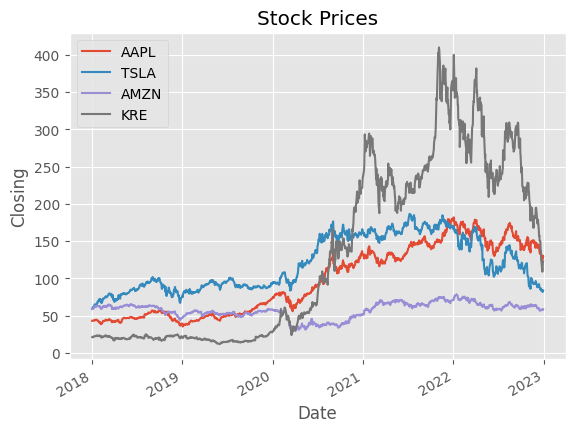

In [67]:
price['Close'].plot()
plt.title("Stock Prices")
plt.xlabel('Date')
plt.ylabel('Closing')
plt.legend(stocks)
plt.show()